In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical, img_to_array, array_to_img
from sklearn.metrics import classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape([-1, 784])
x_train=np.dstack([x_train]*3)
x_train = x_train.reshape(-1, 28, 28, 3)
x_train=np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_train = x_train.astype('float32') / 255.
print('x_train shape:', x_train.shape)

x_test = x_test.reshape([-1, 784])
x_test=np.dstack([x_test]*3)
x_test = x_test.reshape(-1, 28, 28, 3)
x_test=np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_test = x_test.astype('float32') / 255.
print('x_test shape:', x_test.shape)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train shape: (60000, 48, 48, 3)
x_test shape: (10000, 48, 48, 3)


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=((48, 48, 3)))
base_model.trainable = False

In [4]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train, epochs=8, batch_size=128, validation_split=0.2)

Epoch 1/8
375/375 [==============================] - 1031s 3s/step - loss: 1.2160 - accuracy: 0.6653 - val_loss: 0.7077 - val_accuracy: 0.7796
Epoch 2/8
375/375 [==============================] - 1024s 3s/step - loss: 0.6128 - accuracy: 0.8010 - val_loss: 0.5580 - val_accuracy: 0.8117
Epoch 3/8
375/375 [==============================] - 1084s 3s/step - loss: 0.5221 - accuracy: 0.8216 - val_loss: 0.5031 - val_accuracy: 0.8238
Epoch 4/8
375/375 [==============================] - 1012s 3s/step - loss: 0.4788 - accuracy: 0.8337 - val_loss: 0.4711 - val_accuracy: 0.8360
Epoch 5/8
375/375 [==============================] - 1010s 3s/step - loss: 0.4508 - accuracy: 0.8422 - val_loss: 0.4512 - val_accuracy: 0.8407
Epoch 6/8
375/375 [==============================] - 1070s 3s/step - loss: 0.4314 - accuracy: 0.8473 - val_loss: 0.4348 - val_accuracy: 0.8448
Epoch 7/8
375/375 [==============================] - 1010s 3s/step - loss: 0.4159 - accuracy: 0.8528 - val_loss: 0.4224 - val_accuracy: 0.8499

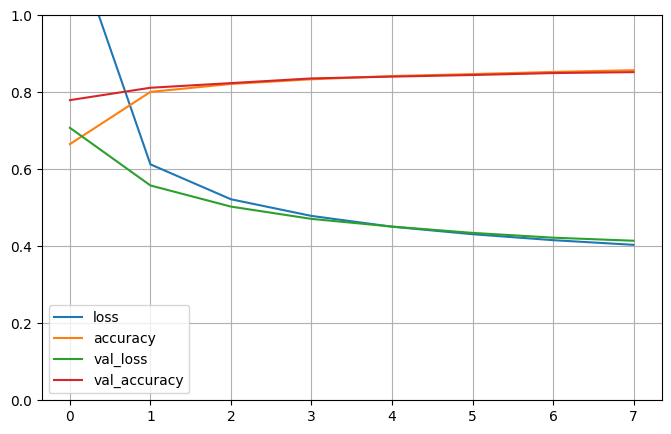

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train loss: {train_loss:.4f}")
print(f"Train accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

1875/1875 [==============================] - 1038s 554ms/step - loss: 0.4025 - accuracy: 0.8570
Train loss: 0.4025
Train accuracy: 0.8570
313/313 [==============================] - 173s 554ms/step - loss: 0.4271 - accuracy: 0.8479
Test loss: 0.4271
Test accuracy: 0.8479


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

313/313 [==============================] - 174s 554ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.82      0.80      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.79      0.77      0.78      1000
       Dress       0.82      0.83      0.83      1000
        Coat       0.69      0.82      0.75      1000
      Sandal       0.93      0.94      0.93      1000
       Shirt       0.66      0.53      0.59      1000
     Sneaker       0.92      0.92      0.92      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.94      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



**Висновок:** Звичайна мережа досягла кращої точності ніж VGG16 при однаковому розмірі батчу та однаковій кількості навчальних.